In [1]:
import numpy as np 
import random
import math 
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import base64
import pandas as pd
from IPython.display import HTML
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
prices=pd.read_csv("PricesFile1.csv")
df_wti=prices[prices.priceindex=='WTI NYMEX LIGHT SWEET']
df_wti=df_wti[pd.to_datetime(df_wti.pricedate) < pd.to_datetime(df_wti.delivdate)]
df_wti.rename(columns={'priceindex':'volatilityindex','pricedate': 'volatilitydate', 'delivdate': 'begtime'},inplace=True)
parms=np.zeros((10,2))

In [2]:
def OU_path(a,b,sigma,init,T):
    dt = .25  # Time step.
    T =  T # Total time.
    tau = .5
    sqrtdt = np.sqrt(dt)
    sigma_bis = sigma#* np.sqrt(2. / tau)
    n = int(T / dt)  # Number of time steps.
    x = np.zeros(n)
    t = np.linspace(0., T, n)  # Vector of times.
    x[0]=init
    for i in range(n - 1):
        x[i + 1] = x[i] +  a*(b - x[i] ) *dt + sigma_bis * sqrtdt * np.random.randn()
    return x

def OU_path2(a,b,sigma,init):
    delta = .25 # Time step.
    T = 32.  # Total time.
    n = int(T / delta)  # Number of time steps.
    x = np.zeros(n)
    sqrtdt = np.sqrt(delta)
    t = np.linspace(0., T, n)  # Vector of times.
    x[0]=init    # initial value
    for i in range(n - 1):
        q= b*(1 - math.exp(-a*delta) )
        r=sigma*math.sqrt((1- math.exp(-2*a*delta)/2*a))*np.random.randn()                         
        x[i + 1] = x[i]*math.exp(-a*delta) + q + r
    return x

2.3778124247614643

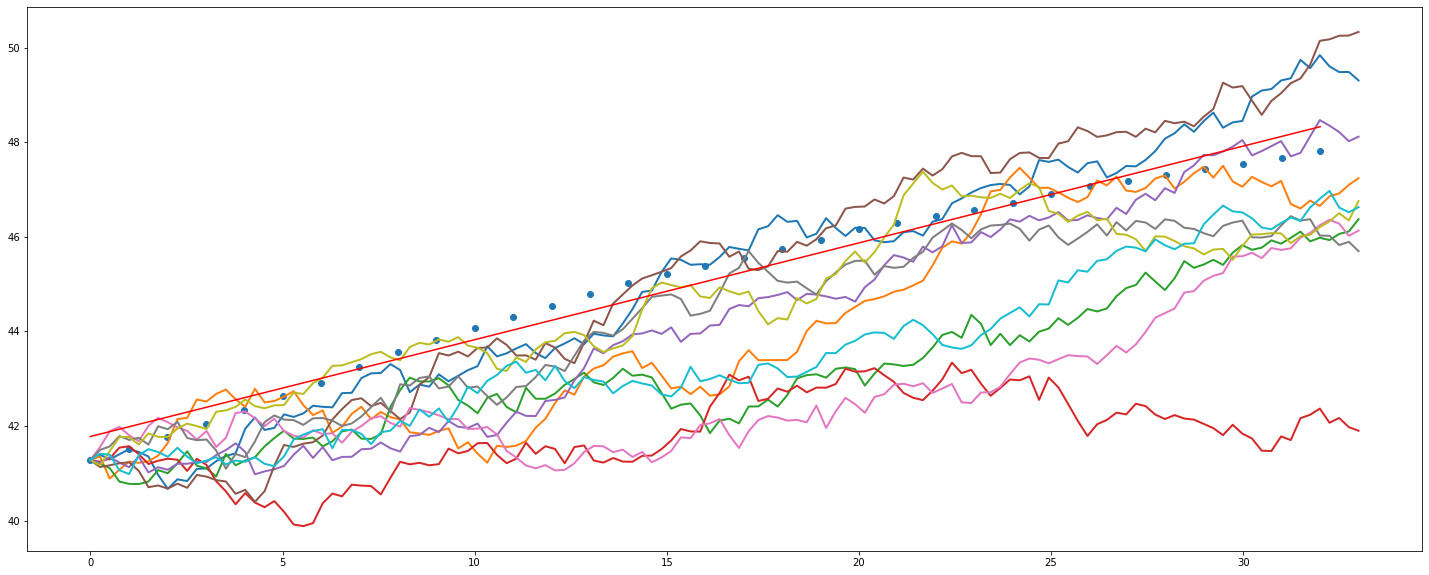

In [3]:
## 1st data 2nd method
df_wti_1=df_wti[df_wti.volatilitydate =='2020-03-06'] 
Z = df_wti_1.to_numpy()
X=np.arange(len(df_wti_1.price)).reshape(-1, 1)
Y = Z[:,3]
Y= Y.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
m1=linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

Sx = sum(df_wti_1.price)-df_wti_1.price.iloc[len(df_wti_1.price)-1]
Sy=sum(df_wti_1.price)-df_wti_1.price.iloc[0]
Sxx= sum((df_wti_1.price)**2)-(df_wti_1.price.iloc[len(df_wti_1.price)-1])**2
Syy = sum((df_wti_1.price)**2)-(df_wti_1.price.iloc[0])**2
Sxy=0
for i in range(len(df_wti_1.price)-1):
    Sxy = Sxy+df_wti_1.price.iloc[i]*df_wti_1.price.iloc[i+1]
Sx,Sxy,Sxx,Syy,Sy
T=len(df_wti_1.price)
dt=.25
n = int(T / dt)
t = np.linspace(0., T, n)
no=len(df_wti_1.price)
lmda = (no*Sxy - Sx*Sy )/(no*Sxx - Sx**2 )
mu = (Sy - lmda*Sx)/no
delta=1.
err = math.sqrt((no*Syy - Sy**2 - lmda*(no*Sxy - Sx*Sy))/(no*(no-2))  )
b= (Sy*Sxx-Sx*Sxy)/(no*(Sxx-Sxy) - (Sx**2 - Sx*Sy))
a= -1*math.log((Sxy-b*Sx-b*Sy+no*b**2 )/(Sxx-2*b*Sx+no*b**2))/delta
alph=math.exp(-a*delta)
sigma_cap = math.sqrt(Syy - 2*alph*Sxy+Sxx*alph**2-2*b*(1-alph)*(Sy-alph*Sx)+no*(b**2)*(1 -alph)**2 )
sigma=sigma_cap*math.sqrt(2*a/(1-alph**2))
plt.rcParams['figure.figsize'] = (25,10)
call_p = 0
K=40
npaths=10
for i in range(npaths):
    x= OU_path(a, b , sigma, min(df_wti_1.price),len(df_wti_1.price))
    plt.plot(t, x, lw=2)
    call_p= call_p + max((x[len(df_wti_1.price)] - K),0 )
    
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
call_p = call_p/npaths
call_p

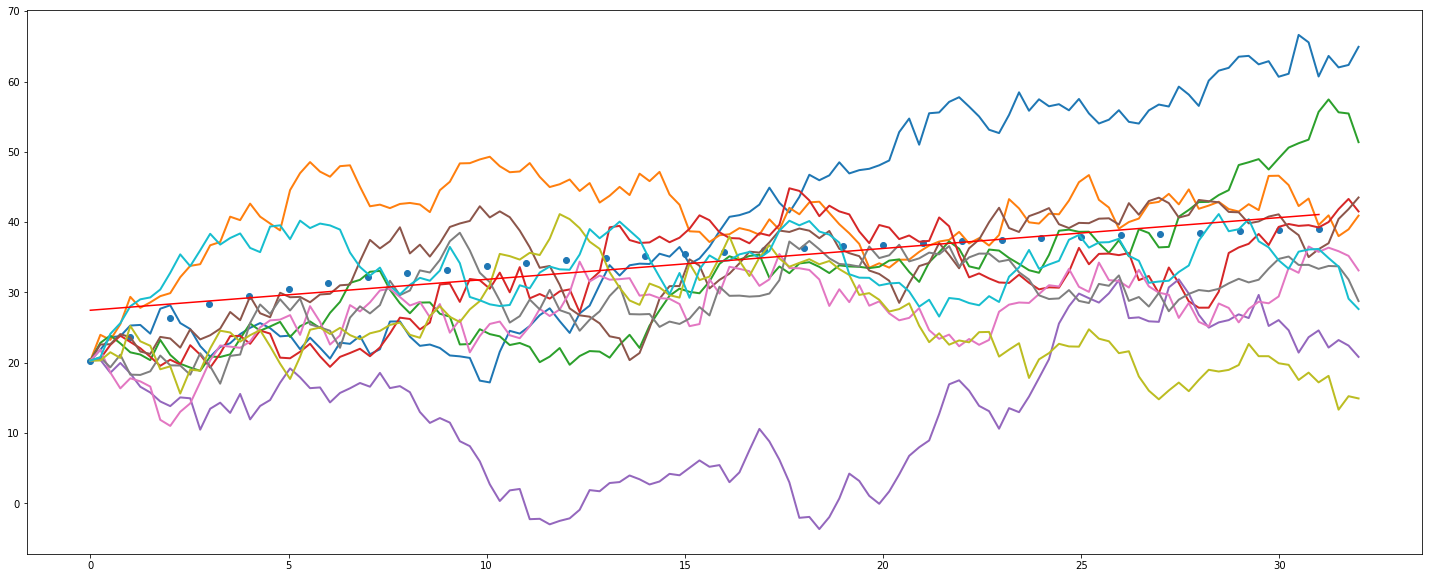

In [4]:
## 2nd data 2nd method
df_wti_2 = df_wti[df_wti.volatilitydate=='2020-04-01']
Z = df_wti_2.to_numpy()
X=np.arange(len(df_wti_2.price)).reshape(-1, 1)
Y = Z[:,3]
Y= Y.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
m1=linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
delta = 1.
Sx = sum(df_wti_2.price)-df_wti_2.price.iloc[len(df_wti_2.price)-1]                     ## $$ change here(3)
Sy=sum(df_wti_2.price)-df_wti_2.price.iloc[0]                                       ## $$ change here(2)
Sxx= sum((df_wti_2.price)**2)-(df_wti_2.price.iloc[len(df_wti_2.price)-1])**2            ## $$ change here(2)
Syy = sum((df_wti_2.price)**2)-(df_wti_2.price.iloc[0])**2                            ## $$ change here(2)
Sxy=0
for i in range(len(df_wti_2.price)-1):                   ## $$ change here
    Sxy = Sxy+df_wti_2.price.iloc[i]*df_wti_2.price.iloc[i+1]                          ## $$ change here(2)
Sx,Sxy,Sxx,Syy,Sy

no=len(df_wti_2.price)              ##$$ change here
lmda = (no*Sxy - Sx*Sy )/(no*Sxx - Sx**2 )
mu = (Sy - lmda*Sx)/no
delta=1.
err = math.sqrt((no*Syy - Sy**2 - lmda*(no*Sxy - Sx*Sy))/(no*(no-2))  )
b= (Sy*Sxx-Sx*Sxy)/(no*(Sxx-Sxy) - (Sx**2 - Sx*Sy))
a= -1*math.log((Sxy-b*Sx-b*Sy+no*b**2 )/(Sxx-2*b*Sx+no*b**2))/delta
alph=math.exp(-a*delta)
sigma_cap = math.sqrt(Syy - 2*alph*Sxy+Sxx*alph**2-2*b*(1-alph)*(Sy-alph*Sx)+no*(b**2)*(1 -alph)**2 )
sigma=sigma_cap*math.sqrt(2*a/(1-alph**2))
T=len(df_wti_2.price)
dt=.25
n = int(T / dt)
t = np.linspace(0., T, n)

for i in range(10):
    x= OU_path(a, b , sigma, min(df_wti_2.price),len(df_wti_2.price))
    plt.plot(t, x, lw=2)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

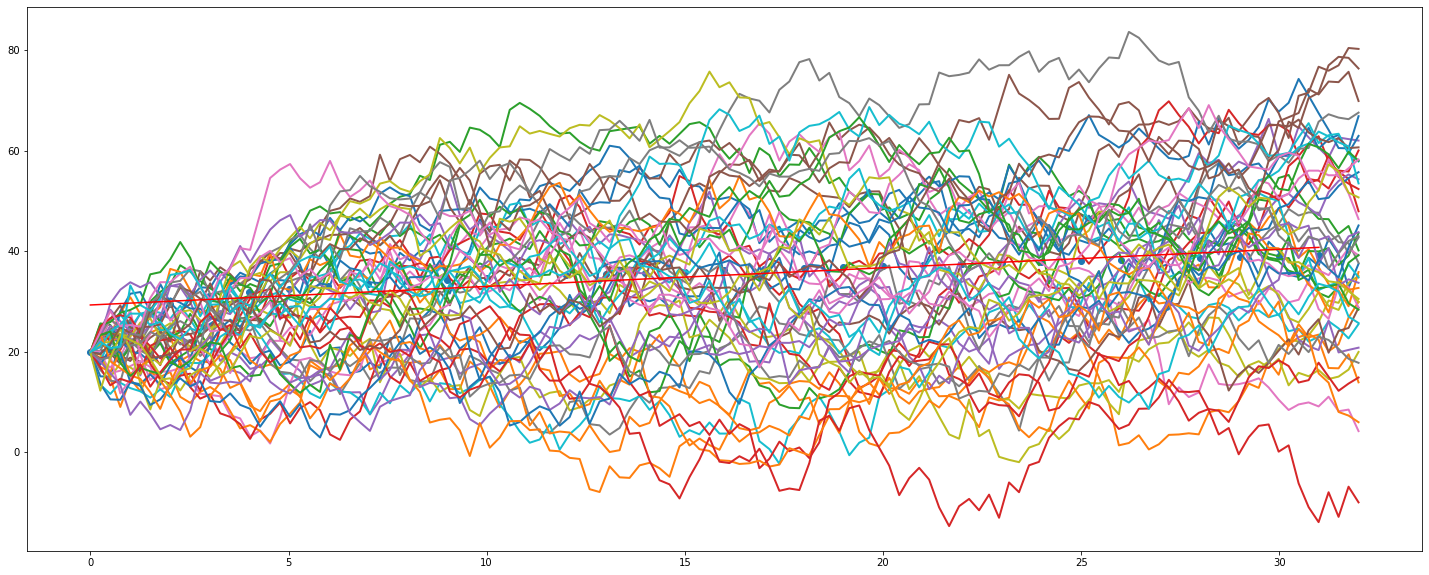

In [5]:
## 3rd data 2nd method
df_wti_3 = df_wti[df_wti.volatilitydate=='2020-04-16']
Z = df_wti_3.to_numpy()                                       ## $$change here
X=np.arange(len(df_wti_3.price)).reshape(-1, 1)                ## $$change here
Y = Z[:,3]
Y= Y.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
m1=linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

Sx = sum(df_wti_3.price)-df_wti_3.price.iloc[len(df_wti_3.price)-1]                     ## $$ change here(3)
Sy=sum(df_wti_3.price)-df_wti_3.price.iloc[0]                                       ## $$ change here(2)
Sxx= sum((df_wti_3.price)**2)-(df_wti_3.price.iloc[len(df_wti_3.price)-1])**2            ## $$ change here(2)
Syy = sum((df_wti_3.price)**2)-(df_wti_3.price.iloc[0])**2                            ## $$ change here(2)
Sxy=0
for i in range(len(df_wti_3.price)-1):                   ## $$ change here
    Sxy = Sxy+df_wti_3.price.iloc[i]*df_wti_3.price.iloc[i+1]                          ## $$ change here(2)
Sx,Sxy,Sxx,Syy,Sy

no=len(df_wti_3.price)
lmda = (no*Sxy - Sx*Sy )/(no*Sxx - Sx**2 )
mu = (Sy - lmda*Sx)/no
delta=1.
err = math.sqrt((no*Syy - Sy**2 - lmda*(no*Sxy - Sx*Sy))/(no*(no-2))  )
b= (Sy*Sxx-Sx*Sxy)/(no*(Sxx-Sxy) - (Sx**2 - Sx*Sy))
a= -1*math.log((Sxy-b*Sx-b*Sy+no*b**2 )/(Sxx-2*b*Sx+no*b**2))/delta
alph=math.exp(-a*delta)
sigma_cap = math.sqrt(Syy - 2*alph*Sxy+Sxx*alph**2-2*b*(1-alph)*(Sy-alph*Sx)+no*(b**2)*(1 -alph)**2 )
sigma=sigma_cap*math.sqrt(2*a/(1-alph**2))
T=len(df_wti_3.price)
dt=.25
n = int(T / dt)
t = np.linspace(0., T, n)
call_p=0
npaths=50
for i in range(npaths):
    x= OU_path(a, b , sigma, min(df_wti_3.price),len(df_wti_3.price))
    plt.plot(t, x, lw=2)
    call_p= call_p + max((x[len(df_wti_3.price)] - K),0 )

call_p = call_p/npaths
call_p
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')


0.0

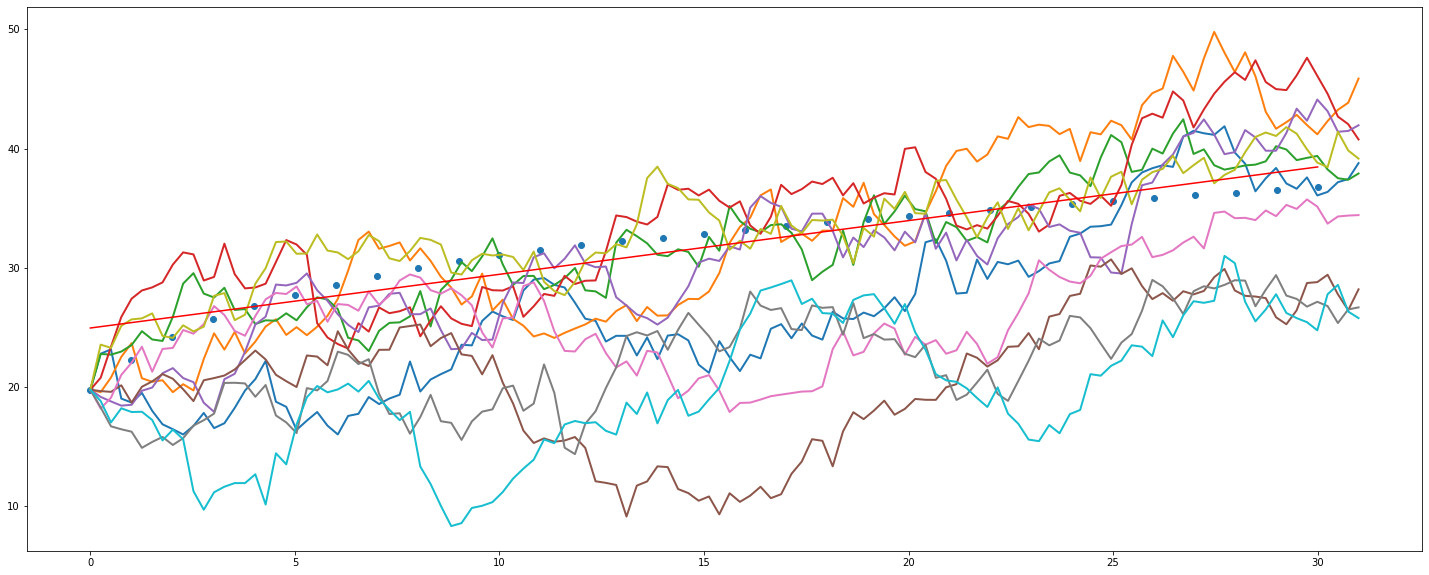

In [6]:
## 4th data 2nd method
df_wti_4 = df_wti[df_wti.volatilitydate=='2020-05-01']
Z = df_wti_4.to_numpy()                                       ## $$change here
X=np.arange(len(df_wti_4.price)).reshape(-1, 1)                ## $$change here
Y = Z[:,3]
Y= Y.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
m1=linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

Sx = sum(df_wti_4.price)-df_wti_4.price.iloc[len(df_wti_4.price)-1]                     ## $$ change here(3)
Sy=sum(df_wti_4.price)-df_wti_4.price.iloc[0]                                       ## $$ change here(2)
Sxx= sum((df_wti_4.price)**2)-(df_wti_4.price.iloc[len(df_wti_4.price)-1])**2            ## $$ change here(2)
Syy = sum((df_wti_4.price)**2)-(df_wti_4.price.iloc[0])**2                            ## $$ change here(2)
Sxy=0
for i in range(len(df_wti_4.price)-1):                   ## $$ change here
    Sxy = Sxy+df_wti_4.price.iloc[i]*df_wti_4.price.iloc[i+1]                          ## $$ change here(2)
Sx,Sxy,Sxx,Syy,Sy

no=len(df_wti_4.price)
lmda = (no*Sxy - Sx*Sy )/(no*Sxx - Sx**2 )
mu = (Sy - lmda*Sx)/no
delta=1.
err = math.sqrt((no*Syy - Sy**2 - lmda*(no*Sxy - Sx*Sy))/(no*(no-2))  )
b= (Sy*Sxx-Sx*Sxy)/(no*(Sxx-Sxy) - (Sx**2 - Sx*Sy))
a= -1*math.log((Sxy-b*Sx-b*Sy+no*b**2 )/(Sxx-2*b*Sx+no*b**2))/delta
alph=math.exp(-a*delta)
sigma_cap = math.sqrt(Syy - 2*alph*Sxy+Sxx*alph**2-2*b*(1-alph)*(Sy-alph*Sx)+no*(b**2)*(1 -alph)**2 )
sigma=sigma_cap*math.sqrt(2*a/(1-alph**2))
T=len(df_wti_4.price)
dt=.25
n = int(T / dt)
t = np.linspace(0., T, n)
call_p=0
npaths=10
K=40
for i in range(npaths):
    x= OU_path(a, b , sigma, min(df_wti_4.price),len(df_wti_4.price))                ##$$ change here
    plt.plot(t, x, lw=2)
    call_p= call_p + max((x[len(df_wti_4.price)] - K),0 )

call_p = call_p/npaths

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
call_p

0
1.6108378603243736
1.6108378603243736
1.6108378603243736
1.6108378603243736
1.6108378603243736
1.6108378603243736
1.6108378603243736
1.8671702512982051
1.8671702512982051
1.8671702512982051
1.8671702512982051
1.8671702512982051
1.8671702512982051
3.9843847720051855
3.9843847720051855
3.9843847720051855
7.406033971782705
13.30791632604494
13.30791632604494
13.30791632604494
13.30791632604494
17.334021882059325
17.334021882059325
18.893086983598845
18.893086983598845
18.893086983598845
18.925903710440643
19.168420132933942
19.944785759826136
19.944785759826136
19.944785759826136
19.944785759826136
19.944785759826136
22.820077957020455
23.185005463587604
23.185005463587604
23.185005463587604
23.605216613007187
23.605216613007187
23.605216613007187
23.605216613007187
29.532781235734127
29.532781235734127
29.532781235734127
29.532781235734127
31.735477601138548
31.735477601138548
35.53419077830046
35.53419077830046


0.7106838155660092

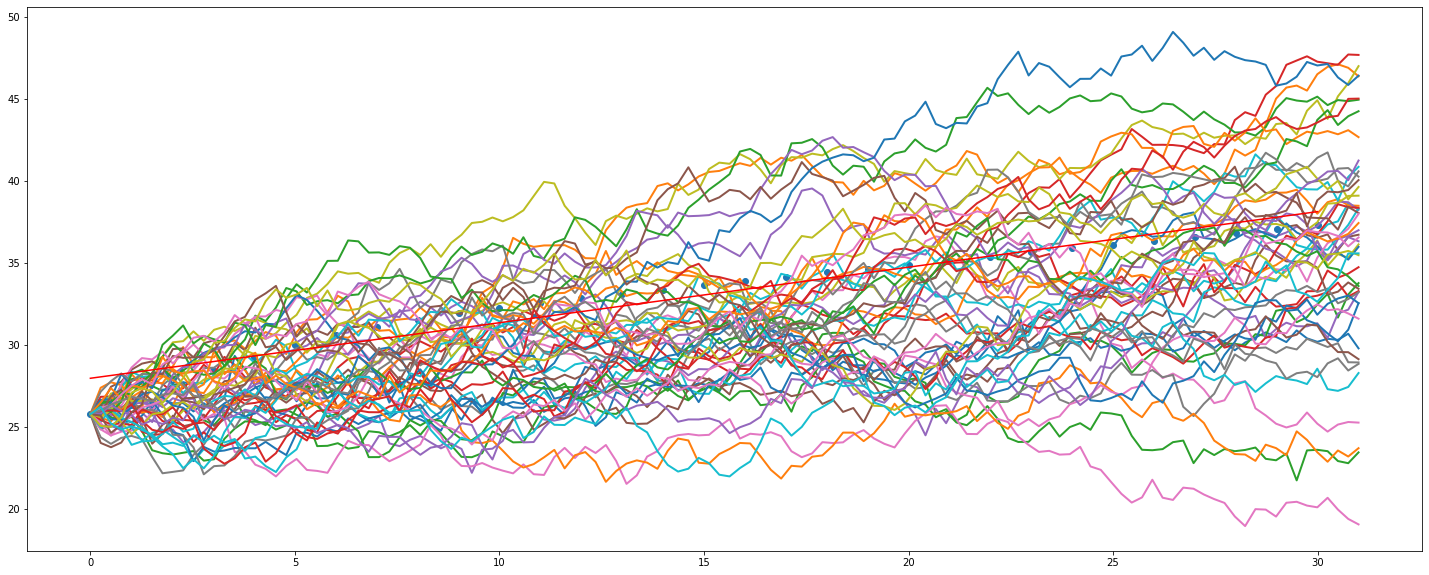

In [7]:
## 5th data 2nd method
df_wti_5 = df_wti[df_wti.volatilitydate=='2020-05-12']
Z = df_wti_5.to_numpy()                                       ## $$change here
X=np.arange(len(df_wti_5.price)).reshape(-1, 1)                ## $$change here
Y = Z[:,3]
Y= Y.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
m1=linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
Sx = sum(df_wti_5.price)-df_wti_5.price.iloc[len(df_wti_5.price)-1]                     ## $$ change here(3)
Sy=sum(df_wti_5.price)-df_wti_5.price.iloc[0]                                       ## $$ change here(2)
Sxx= sum((df_wti_5.price)**2)-(df_wti_5.price.iloc[len(df_wti_5.price)-1])**2            ## $$ change here(3)
Syy = sum((df_wti_5.price)**2)-(df_wti_5.price.iloc[0])**2                            ## $$ change here(2)
Sxy=0
for i in range(len(df_wti_5.price)-1):                   ## $$ change here
    Sxy = Sxy+df_wti_5.price.iloc[i]*df_wti_5.price.iloc[i+1]                          ## $$ change here(2)
Sx,Sxy,Sxx,Syy,Sy

no=len(df_wti_5.price)
lmda = (no*Sxy - Sx*Sy )/(no*Sxx - Sx**2 )
mu = (Sy - lmda*Sx)/no
delta=1.
err = math.sqrt((no*Syy - Sy**2 - lmda*(no*Sxy - Sx*Sy))/(no*(no-2))  )
b= (Sy*Sxx-Sx*Sxy)/(no*(Sxx-Sxy) - (Sx**2 - Sx*Sy))
a= -1*math.log((Sxy-b*Sx-b*Sy+no*b**2 )/(Sxx-2*b*Sx+no*b**2))/delta
alph=math.exp(-a*delta)
sigma_cap = math.sqrt(Syy - 2*alph*Sxy+Sxx*alph**2-2*b*(1-alph)*(Sy-alph*Sx)+no*(b**2)*(1 -alph)**2 )
sigma=sigma_cap*math.sqrt(2*a/(1-alph**2))
T=len(df_wti_5.price)
dt=.25
n = int(T / dt)
t = np.linspace(0., T, n)
npaths=50
call_p=0
K=30
for i in range(npaths):
    x= OU_path(a, b , sigma, min(df_wti_5.price),len(df_wti_5.price))                ##$$ change here
    plt.plot(t, x, lw=2)
    call_p = call_p + max((x[len(df_wti_5.price)] - K),0 )
    print(call_p)

call_p = call_p/npaths

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
call_p


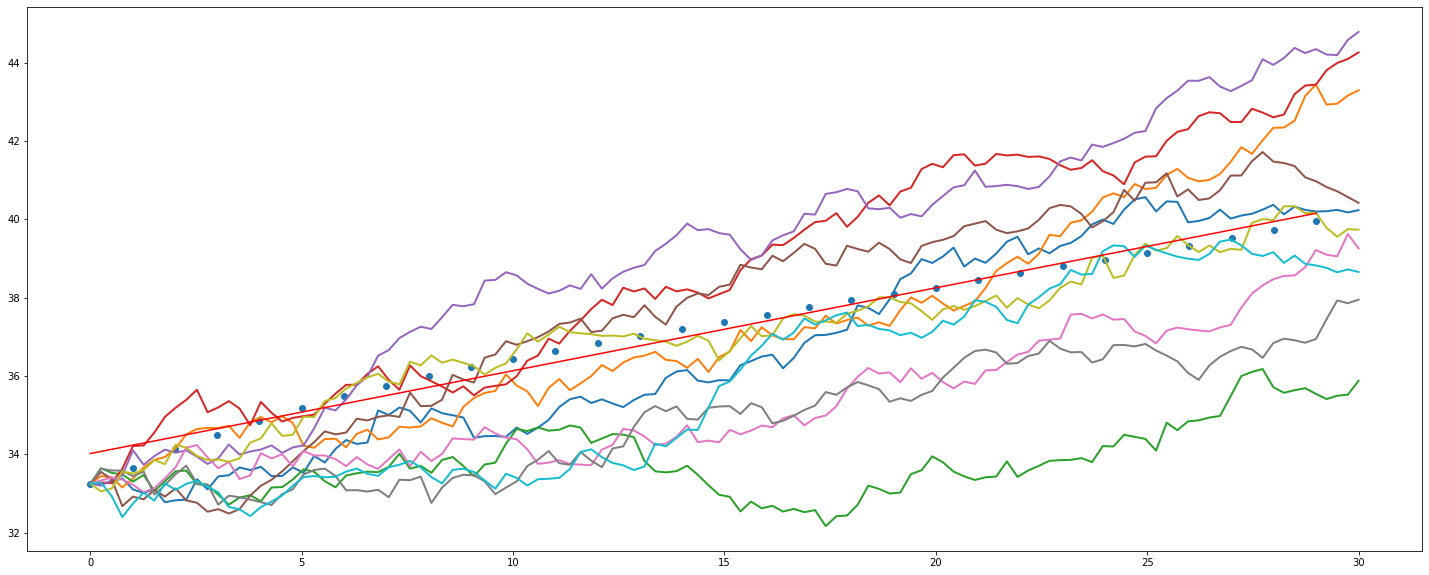

In [8]:
## 5th data 2nd method
df_wti_6 = df_wti[df_wti.volatilitydate=='2020-05-22']
Z = df_wti_6.to_numpy()                                       ## $$change here
X=np.arange(len(df_wti_6.price)).reshape(-1, 1)                ## $$change here
Y = Z[:,3]
Y= Y.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
m1=linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
Sx = sum(df_wti_6.price)-df_wti_6.price.iloc[len(df_wti_6.price)-1]                     ## $$ change here(3)
Sy=sum(df_wti_6.price)-df_wti_6.price.iloc[0]                                       ## $$ change here(2)
Sxx= sum((df_wti_6.price)**2)-(df_wti_6.price.iloc[len(df_wti_6.price)-1])**2            ## $$ change here(3)
Syy = sum((df_wti_6.price)**2)-(df_wti_6.price.iloc[0])**2                            ## $$ change here(2)
Sxy=0
for i in range(len(df_wti_6.price)-1):                   ## $$ change here
    Sxy = Sxy+df_wti_6.price.iloc[i]*df_wti_6.price.iloc[i+1]                          ## $$ change here(2)
Sx,Sxy,Sxx,Syy,Sy

no=len(df_wti_6.price)
lmda = (no*Sxy - Sx*Sy )/(no*Sxx - Sx**2 )
mu = (Sy - lmda*Sx)/no
delta=1.
err = math.sqrt((no*Syy - Sy**2 - lmda*(no*Sxy - Sx*Sy))/(no*(no-2))  )
b= (Sy*Sxx-Sx*Sxy)/(no*(Sxx-Sxy) - (Sx**2 - Sx*Sy))
a= -1*math.log((Sxy-b*Sx-b*Sy+no*b**2 )/(Sxx-2*b*Sx+no*b**2))/delta
alph=math.exp(-a*delta)
sigma_cap = math.sqrt(Syy - 2*alph*Sxy+Sxx*alph**2-2*b*(1-alph)*(Sy-alph*Sx)+no*(b**2)*(1 -alph)**2 )
sigma=sigma_cap*math.sqrt(2*a/(1-alph**2))
T=len(df_wti_6.price)
dt=.25
n = int(T / dt)
t = np.linspace(0., T, n)

for i in range(10):
    x= OU_path(a, b , sigma, min(df_wti_6.price),len(df_wti_6.price))                ##$$ change here
    plt.plot(t, x, lw=2)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')


In [9]:
## To calculate parameters a,b for various starting dates. There are 48 different starting dates
date_set =df_wti.volatilitydate.unique()
l=np.random.choice(date_set, 48)  ## why 48 as we may take 75% of 63 unique date
#parms_a=np.zeros((48,1))
#parms_b=np.zeros((48,1))
m=[]
c=[]
e=[]
for i in range(48):
    df_wti_set=df_wti[df_wti.volatilitydate==l[i]]
    Z = df_wti_set.to_numpy()                                       ## $$change here
    X=np.arange(len(df_wti_set.price)).reshape(-1, 1)                ## $$change here
    Y = Z[:,3]
    Y= Y.reshape(-1, 1)
    Sx = sum(df_wti_set.price)-df_wti_set.price.iloc[len(df_wti_set.price)-1]                     ## $$ change here(3)
    Sy=sum(df_wti_set.price)-df_wti_set.price.iloc[0]                                       ## $$ change here(2)
    Sxx= sum((df_wti_set.price)**2)-(df_wti_set.price.iloc[len(df_wti_set.price)-1])**2            ## $$ change here(3)
    Syy = sum((df_wti_set.price)**2)-(df_wti_set.price.iloc[0])**2                            ## $$ change here(2)
    Sxy=0
    for i in range(len(df_wti_set.price)-1):                     ## $$ change here
        Sxy = Sxy+df_wti_set.price.iloc[i]*df_wti_set.price.iloc[i+1]                          ## $$ change here(2)

    no=len(df_wti_set.price)
    lmda = (no*Sxy - Sx*Sy )/(no*Sxx - Sx**2 )
    mu = (Sy - lmda*Sx)/no
    delta=1.                                            ####$$$$ We can vary this 
    err = math.sqrt((no*Syy - Sy**2 - lmda*(no*Sxy - Sx*Sy))/(no*(no-2))  )
    b= (Sy*Sxx-Sx*Sxy)/(no*(Sxx-Sxy) - (Sx**2 - Sx*Sy))
    a= -1*math.log((Sxy-b*Sx-b*Sy+no*b**2 )/(Sxx-2*b*Sx+no*b**2))/delta
    alph=math.exp(-a*delta)
    sigma_cap = math.sqrt(Syy - 2*alph*Sxy+Sxx*alph**2-2*b*(1-alph)*(Sy-alph*Sx)+no*(b**2)*(1 -alph)**2 )
    sigma=sigma_cap*math.sqrt(2*a/(1-alph**2))
    e.append(sigma)
    m.append(a)
    c.append(b)
plt.plot(m)            ### to see behaviour of the speed of mean rev across 75% of the dates

2.6609695775922177

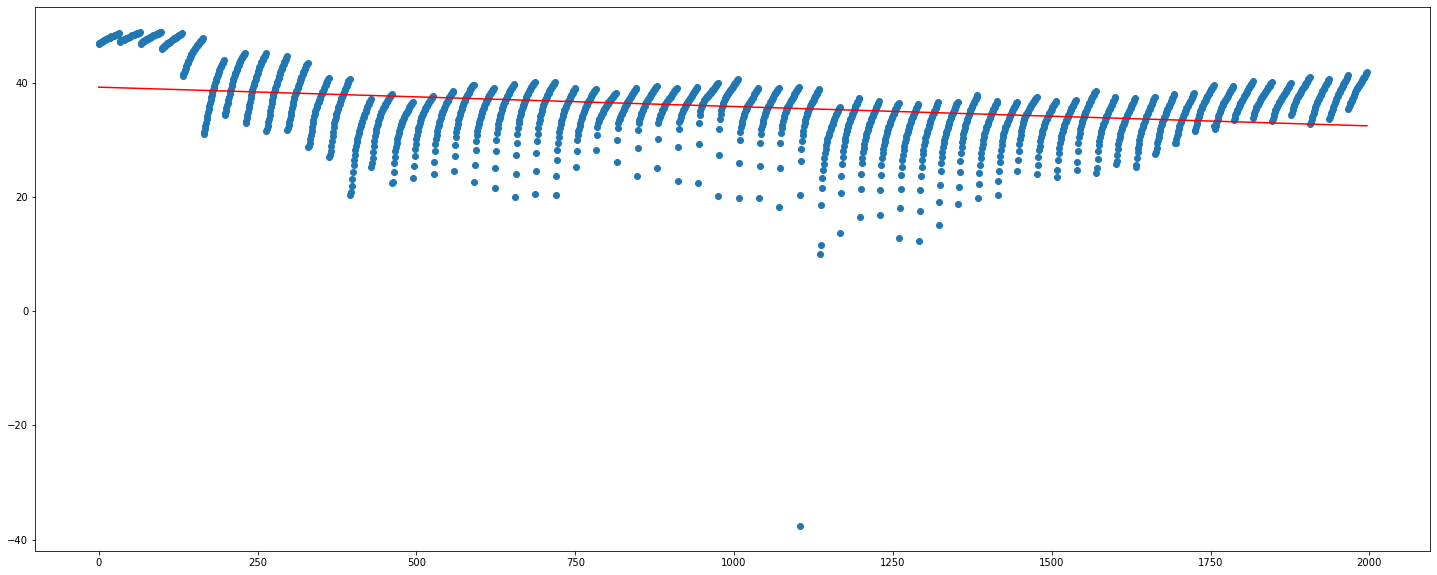

In [15]:
## 2nd data 2nd method
df_wti_2 = df_wti
Z = df_wti_2.to_numpy()
X=np.arange(len(df_wti_2.price)).reshape(-1, 1)
Y = Z[:,3]
Y= Y.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
m1=linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 
delta = 1.
Sx = sum(df_wti_2.price)-df_wti_2.price.iloc[len(df_wti_2.price)-1]                     ## $$ change here(3)
Sy=sum(df_wti_2.price)-df_wti_2.price.iloc[0]                                       ## $$ change here(2)
Sxx= sum((df_wti_2.price)**2)-(df_wti_2.price.iloc[len(df_wti_2.price)-1])**2            ## $$ change here(2)
Syy = sum((df_wti_2.price)**2)-(df_wti_2.price.iloc[0])**2                            ## $$ change here(2)
Sxy=0
for i in range(len(df_wti_2.price)-1):                   ## $$ change here
    Sxy = Sxy+df_wti_2.price.iloc[i]*df_wti_2.price.iloc[i+1]                          ## $$ change here(2)
Sx,Sxy,Sxx,Syy,Sy

no=len(df_wti_2.price)              ##$$ change here
lmda = (no*Sxy - Sx*Sy )/(no*Sxx - Sx**2 )
mu = (Sy - lmda*Sx)/no
delta=1.
err = math.sqrt((no*Syy - Sy**2 - lmda*(no*Sxy - Sx*Sy))/(no*(no-2))  )
b= (Sy*Sxx-Sx*Sxy)/(no*(Sxx-Sxy) - (Sx**2 - Sx*Sy))
a= -1*math.log((Sxy-b*Sx-b*Sy+no*b**2 )/(Sxx-2*b*Sx+no*b**2))/delta
alph=math.exp(-a*delta)
sigma_cap = math.sqrt(Syy - 2*alph*Sxy+Sxx*alph**2-2*b*(1-alph)*(Sy-alph*Sx)+no*(b**2)*(1 -alph)**2 )
sigma=sigma_cap*math.sqrt(2*a/(1-alph**2))
T=len(df_wti_2.price)
dt=.25
n = int(T / dt)
t = np.linspace(0., T, n)

#for i in range(1):
 #   x= OU_path(a, b , sigma, min(df_wti_2.price),len(df_wti_2.price))
  #  plt.plot(t, x, lw=2)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

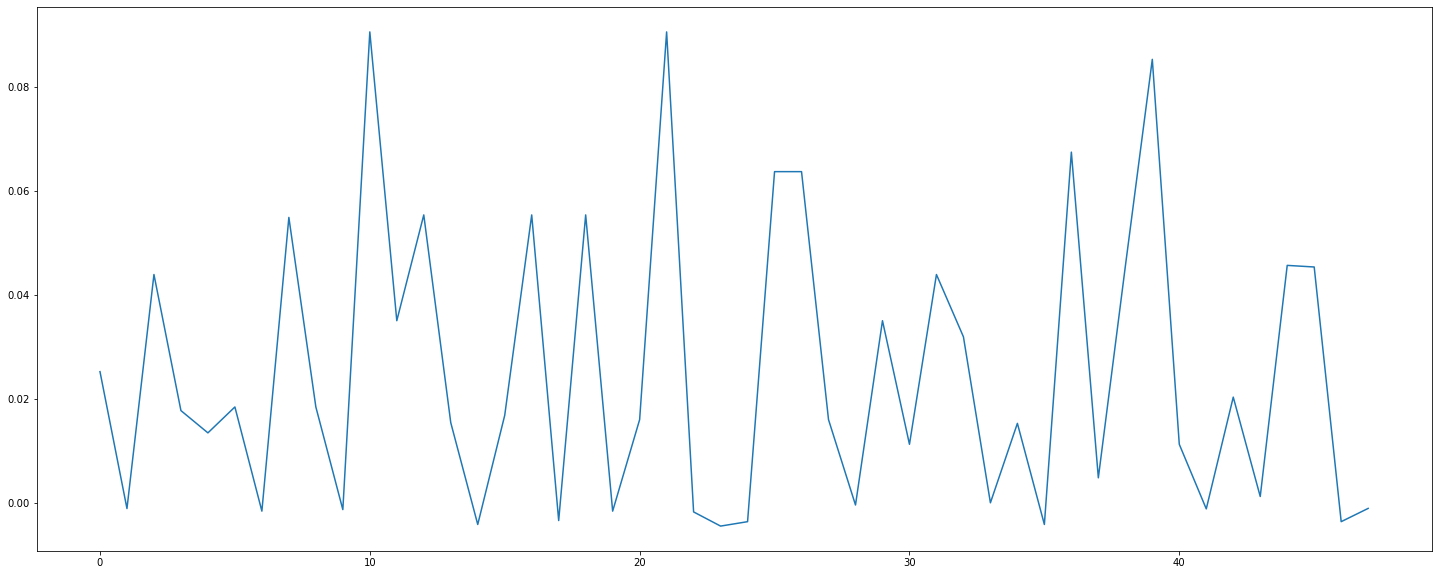

In [13]:
plt.plot(m)

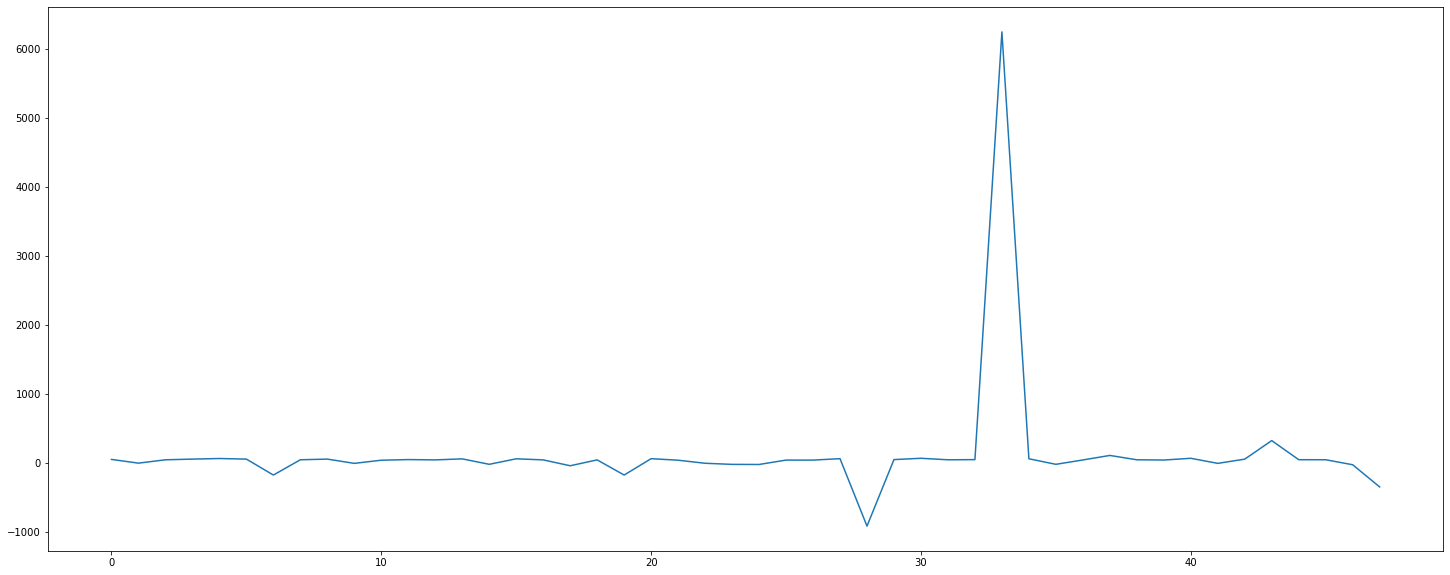

In [14]:
plt.plot(c)